# Make summary histograms of the predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
observed = pd.read_csv('WHONDRS_S19S_SSS_merged.csv')
train_predict = pd.read_csv('WHONDRS_S19S-SSS-log10-r02_predictions.csv')
extrap1_predict = pd.read_csv('RiverAtlas_GLORICH_S19S-SSS-log10-extrap-r01_predictions.csv')
extrap1_ADJ_predict = pd.read_csv('RiverAtlas_GLORICH_S19S-SSS-log10-extrap-r01_bias_adj_predictions.csv')
!gunzip -c grdb_S19S-SSS-log10-extrap-r02_predictions.csv.gz > grdb_predictions.csv
extrap2_predict = pd.read_csv('grdb_predictions.csv')
!rm grdb_predictions.csv

## Define histogram binning

In [3]:
nbin = 50
min_bin = -1.0
max_bin = 4.0

## Make/plot histograms

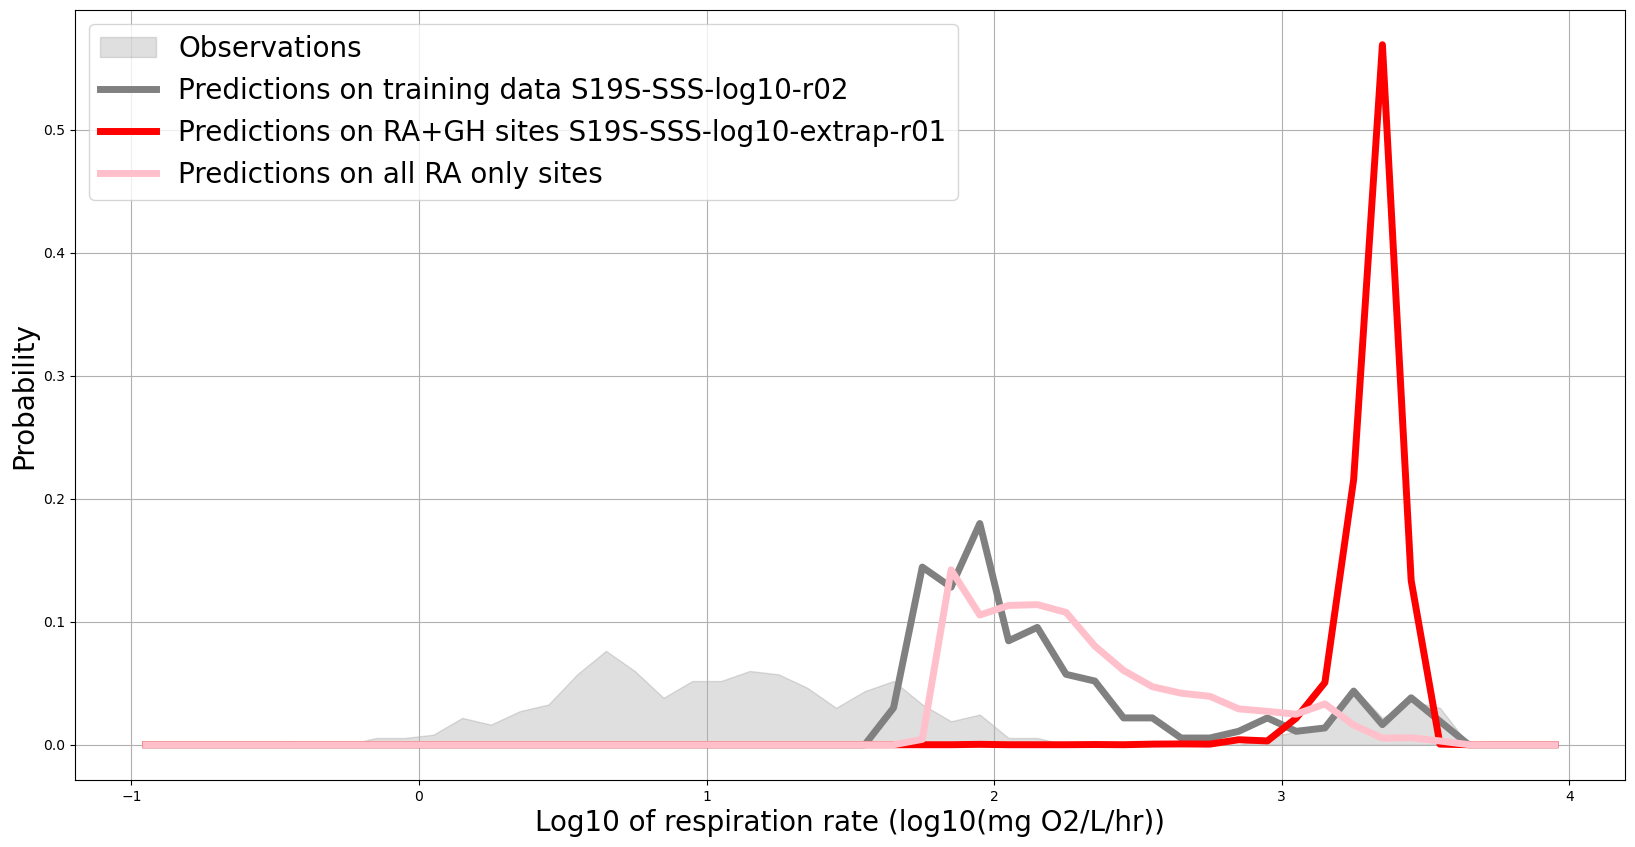

In [6]:


fig, ax = plt.subplots(1,1,figsize=(20,10))

#=================================================
# Observations
#=================================================
counts, bins = np.histogram(np.log10(np.abs(
    observed[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))

# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
ax.fill_between((bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), color=('gray'), alpha=0.25)

#=================================================
# Training set
#=================================================
counts, bins = np.histogram(np.log10(np.abs(
    train_predict[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))

ax.plot((bins[:-1]+bins[1:])/2,counts/np.sum(counts), color=('gray'), linewidth=5)

#=================================================
# Extrapolations set 1
#=================================================
counts, bins = np.histogram(np.log10(np.abs(
    extrap1_predict[
        'mean'])), bins=nbin, range=(min_bin,max_bin))

# Make a histogram with all the raw points, not the mean value
# to test if there are some ensemble members that are better
# than others.
#counts, bins = np.histogram(np.log10(np.abs((
#    extrap1_predict['sl_0'],
#    extrap1_predict['sl_1'],
#    extrap1_predict['sl_2'],
#    extrap1_predict['sl_3'],
#    extrap1_predict['sl_4'],
#    extrap1_predict['sl_5'],
#    extrap1_predict['sl_6'],
#    extrap1_predict['sl_7'],
#    extrap1_predict['sl_8'],
#    extrap1_predict['sl_9']))), bins=nbin, range=(min_bin,max_bin))

ax.plot((bins[:-1]+bins[1:])/2,counts/np.sum(counts), color=('red'),linewidth=5)

#=================================================
# Extrapolations set 1 ADJ
#=================================================
#counts, bins = np.histogram(np.log10(np.abs(
#    extrap1_ADJ_predict[
#        'mean'])), bins=nbin, range=(min_bin,max_bin))

#ax.fill_between((bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), color=('orange'), alpha=0.25)

#=================================================
# Extrapolations set 2
#=================================================
counts, bins = np.histogram(np.log10(np.abs(
    extrap2_predict[
        'mean'])), bins=nbin, range=(min_bin,max_bin))

ax.plot((bins[:-1]+bins[1:])/2,counts/np.sum(counts), color=('pink'), linewidth=5)

ax.grid()
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Log10 of respiration rate (log10(mg O2/L/hr))', fontsize=20)
ax.legend(['Observations','Predictions on training data S19S-SSS-log10-r02','Predictions on RA+GH sites S19S-SSS-log10-extrap-r01','Predictions on all RA only sites'],fontsize=20)

#=================================================
# Write figure to file
#=================================================
plt.savefig('fig08-prediction-histograms.pdf')